In [388]:
from pyTT import TTReco
import trackml
from trackml.dataset import load_event, load_dataset
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd

In [402]:
filename = "/bigdata/shared/TrackML/train_100_events/event000001000"

hits, cells, particles, truth = load_event(filename)
hits = pd.merge(hits,truth,on='hit_id')
hits['phi'] = np.arctan2(hits['y'],hits['x'])
hits['r'] = np.sqrt(hits['y']*hits['y']+hits['x']*hits['x'])
hits['tpt'] = np.sqrt(hits['tpx']*hits['tpx']+hits['tpy']*hits['tpy'])
hits['index'] = hits.index
hits.sort_values(by=['phi'],inplace=True)
hl1 = hits.query('volume_id==8 & layer_id==2')
hl2 = hits.query('volume_id==8 & layer_id==4')
hl3 = hits.query('volume_id==8 & layer_id==6')
hl4 = hits.query('volume_id==8 & layer_id==8')

i1 = hl1.index

d1 =  [list(x) for x in hl1[["x", "y", "z", "particle_id", "index"]].values]
d2 =  [list(x) for x in hl2[["x", "y", "z", "particle_id", "index"]].values]
d3 =  [list(x) for x in hl3[["x", "y", "z", "particle_id", "index"]].values]

In [403]:
# xyz coordinates of hits on three seeding layers
layerPoints = [d1, d2, d3]
result = TTReco(theHits=layerPoints, thetaCut=0.002, phiCut=1., phiCut_d = 0.04, ptMin=0.8, regionOriginRadius=100, hardPtCut=0.0)
print(len(result))
for indices in result[:4]:
  for i in indices:
    print(hits.loc[i])
  print("\n\n\n")
print(result[0])

147468
hit_id         2.145700e+04
x             -3.330480e+01
y             -2.312330e-03
z              7.018300e+01
volume_id      8.000000e+00
layer_id       2.000000e+00
module_id      1.130000e+02
particle_id    7.430963e+17
tx            -3.330480e+01
ty            -2.285290e-03
tz             7.017920e+01
tpx           -1.200680e+00
tpy            1.059630e-02
tpz            2.586500e+00
weight         1.794340e-05
phi           -3.141523e+00
r              3.330480e+01
tpt            1.200727e+00
index          2.145600e+04
Name: 21456, dtype: float64
hit_id         3.145500e+04
x             -7.309650e+01
y             -6.358510e-02
z              1.604890e+02
volume_id      8.000000e+00
layer_id       4.000000e+00
module_id      2.890000e+02
particle_id    3.692957e+17
tx            -7.309710e+01
ty            -6.088570e-02
tz             1.604940e+02
tpx           -2.228620e+00
tpy            2.052180e-02
tpz            4.946130e+00
weight         2.247240e-05
phi          

In [404]:
l = hl1["particle_id"]

In [405]:
s = set(l.to_list())

In [406]:
l = list(s)

In [407]:
trueResults = []

for item in l: # item is a unique ID
    newTriplet = []

    queried = hl1.query("particle_id == " + str(item))
    if len(queried["hit_id"]) <= 0:
        continue
    else:
        newTriplet.append(queried["hit_id"].values[0])
    
    queried = hl2.query("particle_id == " + str(item))
    if len(queried["hit_id"]) <= 0:
        continue
    else:
        newTriplet.append(queried["hit_id"].values[0])
    
    queried = hl3.query("particle_id == " + str(item))
    if len(queried["hit_id"]) <= 0:
        continue
    else:
        newTriplet.append(queried["hit_id"].values[0])
    trueResults.append(newTriplet)

In [408]:
len(trueResults)

4571

In [409]:
randomIndexes = np.random.permutation(range(len(result)))[:100]

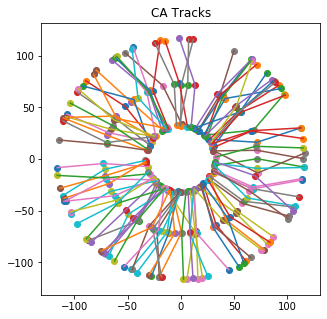

In [410]:
plt.figure(figsize = (5, 5)) # Cellular Automaton
plt.title("CA Tracks")

for index in randomIndexes:
    item = result[index]
    x_coords = []
    y_coords = []
    
    queried = hl1.query("hit_id == " + str(item[0]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl2.query("hit_id == " + str(item[1]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl3.query("hit_id == " + str(item[2]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])

    plt.plot(x_coords, y_coords)

In [411]:
randomIndexes = np.random.permutation(range(len(trueResults)))[:100]

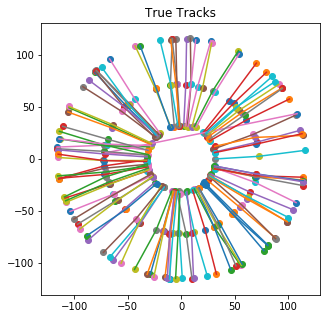

In [412]:
plt.figure(figsize = (5, 5)) # True Tracks
plt.title("True Tracks")

for index in randomIndexes:
    item = trueResults[index]
    x_coords = []
    y_coords = []

    queried = hl1.query("hit_id == " + str(item[0]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl2.query("hit_id == " + str(item[1]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])

    queried = hl3.query("hit_id == " + str(item[2]))
    if len(queried["x"].values) > 0 and len(queried["y"].values) > 0:
        x_coords.append(queried["x"].values[0])
        y_coords.append(queried["y"].values[0])
    plt.scatter(queried["x"], queried["y"])

    plt.plot(x_coords, y_coords)

In [413]:
def avg(lst):
    sum = 0
    for element in lst:
        sum += element
    return sum / len(lst)

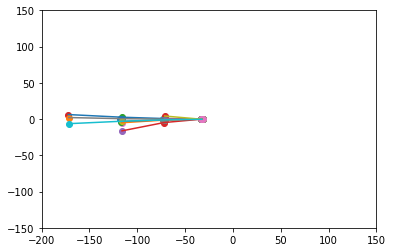

In [414]:
plt.xlim(-200, 150)
plt.ylim(-150, 150)

for item in l[:10]: # item is a unique ID
    x_coords = []
    y_coords = []
    
    queried = hl1.query("particle_id == " + str(item))
    if len(queried["x"]) > 0 and len(queried["y"]) > 0:
        x_coords.append(avg(queried["x"].values))
        y_coords.append(avg(queried["y"].values))
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl2.query("particle_id == " + str(item))
    if len(queried["x"]) > 0 and len(queried["y"]) > 0:
        x_coords.append(avg(queried["x"].values))
        y_coords.append(avg(queried["y"].values))
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl3.query("particle_id == " + str(item))
    if len(queried["x"]) > 0 and len(queried["y"]) > 0:
        x_coords.append(avg(queried["x"].values))
        y_coords.append(avg(queried["y"].values))
    plt.scatter(queried["x"], queried["y"])
    
    queried = hl4.query("particle_id == " + str(item))
    if len(queried["x"]) > 0 and len(queried["y"]) > 0:
        x_coords.append(avg(queried["x"].values))
        y_coords.append(avg(queried["y"].values))
    plt.scatter(queried["x"], queried["y"])

    plt.plot(x_coords, y_coords)